# Project: Investigate the TMBD Data Set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#libraries">The required imported libraries</a></li>
<li><a href="#wrangling">The Data Wrangling Process</a></li>
<li><a href="#cleaning">Detailed Data Cleaning Process</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
*The TMDb (The Movie Database) is a comprehensive movie database that provides information about 10,000 movies collected, including details like titles, ratings, release dates, revenue, genres, and much more.*


### Questions regarding General Trends & Patterns:-
1.What is the distribution of movie runtimes?

2.Which movies have the highest and least- budget, revenues & find the relation between them


### Questions regarding Genre-Based Insights:-
1.What are the most common movie genres?

2.How do different genres compare in terms of popularity?



<a id='libraries'></a>
# The required imported libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
# The Data Wrangling Process


In [3]:
#  Display the first five rows to understand the structure of the data
movie_data_set = pd.read_csv("tmdb-movies.csv")
display(movie_data_set.head())

# Gets basic info of the dataset
movie_data_set.info()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

This dataset contains of (21) columns & (10866) rows.
 We can see that there are (4) features with float values,
 (6) values with integer values & (11) with string values.
 


#### 2.1) Check null values 


In [4]:
# Counting the missing values in each column to identify areas needing cleaning.
print(f"Number of missing values in each column:\n{movie_data_set.isnull().sum()}")

Number of missing values in each column:
id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


#### 2.2) Check for Duplicate Rows & columns 

In [5]:
# Counting the number of duplicate rows in the dataset
print(f"Number of duplicated rows: {movie_data_set.duplicated().sum()}")

# prints out the specific duplicted row & displays it in a data frame
duplicate_rows = movie_data_set[movie_data_set.duplicated()]
display("Duplicate rows:", duplicate_rows)


# here we check any duplicted columns in the data set
# duplicate_columns = [col for col in movie_data_set.columns if movie_data_set[col].duplicated().any()]
# print(duplicate_columns)

Number of duplicated rows: 1


'Duplicate rows:'

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


#### 2.3) Check for Inconsistencies

In [6]:
print(f"Number of unique value in each column\n{movie_data_set.nunique()}")


Number of unique value in each column
id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


> Most features have a high amount of unique values except for both " vote_average " & "release_year "

<a id='cleaning'></a>
# Detailed Data Cleaning Steps

#### 3.1) Handle Missing Values:

- There are a total of (9) Categorical Columns (imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies ): 
  Fill with “Unknown.”
   

In [ ]:

# A function that iterates through the 9 categorical columns & fill its missing values with “Unknown”
categorical_cols = ["imdb_id","cast","homepage","director", "tagline", "keywords", "overview", "genres", "production_companies"]

def fill_categorical_columns(df, columns, fill_value="Unknown"):
    df[columns] = df[columns].fillna(fill_value)
    return movie_data_set
movie_data_set = fill_categorical_columns(movie_data_set, categorical_cols)

# # Confirm no more missing values
print(movie_data_set.isnull().sum())


id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64


#### 3.2) Remove duplicated rows


In [8]:
movie_data_set = movie_data_set.drop_duplicates()

# confirm the removal 
print(f"Number of duplicates remaining: {movie_data_set.duplicated().sum()}")


Number of duplicates remaining: 0


#### 3.3) inconsistencies 
we have large numbers of unique values in each of the (21) columns. However, both 'vote_average' & 
'release_year' have reasonable amount of unique values that can be handled.                

- Since the 'vote_ average' column represents the average rating out of (10) based on user votes, we can handle the outliers / invalid values such as 0.0 


In [9]:
#

vote_average = movie_data_set['vote_average'].unique()
release_date = movie_data_set['release_date'].unique()
movie_genre = movie_data_set['genres'].unique()


# print(f"{vote_average }\n\n {release_date}\n \n{movie_genre}")

movie_data_set = movie_data_set[movie_data_set['vote_average'] > 0.0]
# display(movie_data_set['vote_average'].unique())

<a id='eda'></a>
# Exploratory Data Analysis (EDA)

* #### 1) Research Question[ General trends & patterns] 
1.What is the distribution of movie runtimes?

2.Which movies have the highest and least- budget, revenues & find the relation between them

Here we are going to create a histogram that visualizes the distribution of the movies runtime per minute . This will help us to understand the general trends and patterns of the movies runtime.

> * NOTE : most movies are between 90-120 minutes long

In [10]:
# Lets find out extreme values in the runtime feature by displaying the summary statistics of the runtime column.
print(movie_data_set['runtime'].describe())

# print(movie_data_set['runtime'].isnull().sum())

count    10865.000000
mean       102.071790
std         31.382701
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64


- The data set has about (10865) movies.
- The average runtime of all movies is (102) minutes, which is about (2 hours) long
 >Two errors in our data describtive statistics which are 'min' = (0) & 'max' = (900) minutes.
 - For the 'min' error we can replace it with the median runtime value
 - For the 'max' error we can replace it with a reasonable max runtime value

In [11]:
# replace 0  with the median

# movie_data_set['runtime'].fillna(movie_data_set['runtime'].median(), inplace=True)
# movie_data_set['runtime'] = movie_data_set['runtime'].fillna(movie_data_set['runtime'].median())

movie_data_set['runtime'] = movie_data_set['runtime'].replace(0, movie_data_set['runtime'].median())
print("New min:", movie_data_set['runtime'].min())  

# handle extremly short movies runtime / min issue 
movie_data_set = movie_data_set[movie_data_set['runtime'] >= 40]



# replace extreme value with a reasonable max value 
movie_data_set = movie_data_set[movie_data_set['runtime'] <= 240]
print("New max:", movie_data_set['runtime'].max())
# print(movie_data_set['runtime'].describe())


New min: 2
New max: 240


Text(-3.9305555555555554, 0.5, 'Number of Movies')

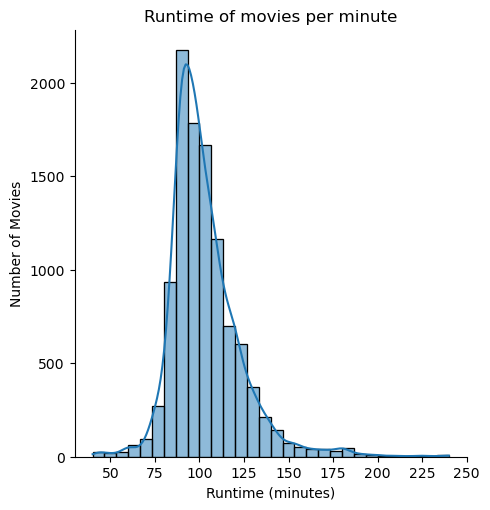

In [12]:
runtime_plot = sns.displot(data = movie_data_set["runtime"], kde= True, bins=30 )

plt.title("Runtime of movies per minute")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Number of Movies")

# print(movie_data_set['runtime'].describe())

> Review of the histogram: 

_There is a tall sharp peak around (90-115) minutes which indicates most movies have a runtime in this range. Some movies have runtimes below (90) minutes, likely including short films._
_Extreme movies' runtime have been removed and replaced with more realistic runtimes which ranges from (50) mins to (225) mins_



* #### 2)  Research Question[ General trends & patterns] 

1 which movies have the highest and least - budget , revenues (Two Numeric Values)
- Show the relation between the budget and revenue of the movies with (Scatter plot)


In [13]:
# Check the budgets & revenues describtive statistics 
print(movie_data_set[['budget', 'revenue']].describe())


             budget       revenue
count  1.060400e+04  1.060400e+04
mean   1.494440e+07  4.078552e+07
std    3.118625e+07  1.182701e+08
min    0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00
75%    1.600000e+07  2.562817e+07
max    4.250000e+08  2.781506e+09


- From the statistics we can see that both budget & revenue has a min of (0)
- Median is 0 for both budget & revenue, which indicates that half of the movies in the dataset has a budget & revenue of 0
- Only 25% of movies have a budget higher than (0) 

Steps:
1) Filter out the movies with a budget of 0
2) Create side by side histograms one for the budget & the other for the revenues
3) Use a Scatter plot to Compare Budget & Revenue & see the CO relation 

In [20]:
# Remove movies where budget or revenue is 0
movie_data_set = movie_data_set[(movie_data_set['budget'] > 0) & (movie_data_set['revenue'] > 0)]

# Verify the filtering worked
print((movie_data_set[['budget', 'revenue']] == 0).sum())
print(movie_data_set[['budget', 'revenue']].describe())


budget     0
revenue    0
dtype: int64
             budget       revenue
count  3.850000e+03  3.850000e+03
mean   3.722881e+07  1.077778e+08
std    4.222104e+07  1.766067e+08
min    1.000000e+00  2.000000e+00
25%    1.000000e+07  1.361207e+07
50%    2.400000e+07  4.483448e+07
75%    5.000000e+07  1.242969e+08
max    4.250000e+08  2.781506e+09


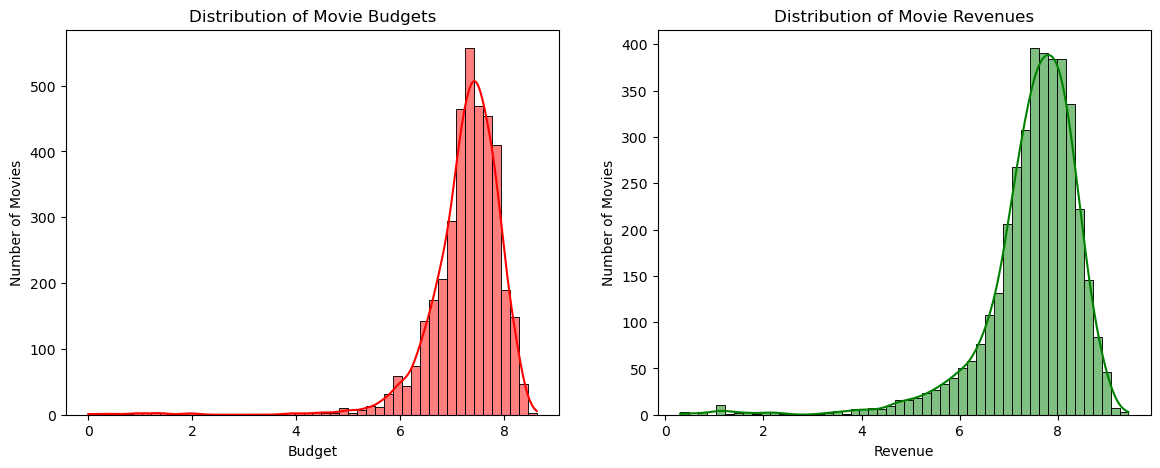

In [15]:
# creat the Budget hisogram
plt.figure(figsize=(14, 5))

# subplot(nrows, ncols, index) -> 'index' targets which plot we need
plt.subplot(1, 2, 1) 
budget_histogram = sns.histplot(np.log10(movie_data_set['budget']), bins=50, kde=True, color='red', label='Budget')
plt.xlabel("Log10(Budget)")
plt.xlabel("Budget")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movie Budgets")

# Revenue histogram
plt.subplot(1, 2, 2) 
budget_histogram = sns.histplot(np.log10(movie_data_set['revenue']), bins=50, kde=True, color='green', label='Revenue')
plt.xlabel("Log10(Revenue)")
plt.xlabel("Revenue")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movie Revenues")

plt.show()

> Review of the two histograms:

We used log10() method which represents the exponent to which a base must be raised
- This function helps wih Large Ranges which are both our budget & revenue values 
- The numbers on both x-axis represent the values of the budget and revenue in the log values in dollars 

#### Distribution of Movie Budget Observations:
- This is a right-skewed distribution
- Most of the data is between (log10(6)) & (log10(8)) which means: Movies are around ($1 million) & up to ($100 million)
- The peak is around ($20 million–$50 million)
- There are a few Movies with a low budget (less than $1 million)
- The tail extends to the right, indicating that there are some movies that have very high revenue (over 1 billion)

#### Distribution of Movie Revenue Observations:
- This is also a right-skewed distribution
- Most of the data is between (log10(7)) & (log10(8.7)) which means: Movies are around ($1 million) & up to ($500 billion)
- The peak is around ($50 million–$200 million)
- There are a few Movies with a low revenue (less than $1 million )
- The tail extends to the right, indicating that there are some movies that have very high revenue (over 1 billion)

#### 2) The relation between movies the budget and revenue of the movies with (Scatter plot)

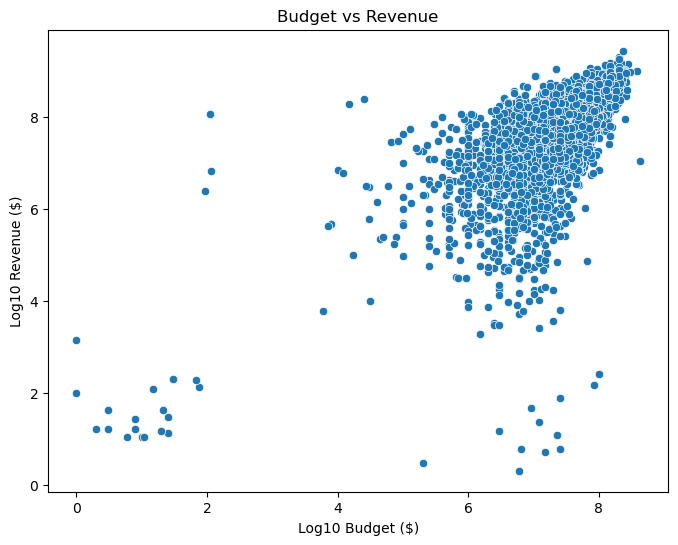

In [16]:
plt.figure(figsize=(8, 6))

# Using density plot
# relation_plot = sns.kdeplot(x = np.log10(movie_data_set["budget"]),
#                              y= np.log10(movie_data_set["revenue"]),
#                              fill = True)

#Using scatter plot
relation_plot = sns.scatterplot(x= np.log10(movie_data_set["budget"]),
                                y=np.log10(movie_data_set['revenue']))

plt.title("Budget vs Revenue")
plt.xlabel("Log10 Budget ($)")
plt.ylabel("Log10 Revenue ($)")
plt.show()


> Review of the Scatter plot:

- This Scatter plot shows a positive correlation between both movies budgets & revenue, as budget increases, revenue also tends to increase
- There is a clear dense cluster in the upper right which indicates most movies have budgets between ($1 million) & ($500 million) (log10: 6-8)
- Second indication : most movies have their revenue range between ($10 million) & ($5 billion) (log10: 7-9)
- There are a few outliers on the bottom left indicating that some movies have low budget but still manage to generate revenue

### 2) Questions regarding Genre-Based Insights:-
1.What are the most common movie genres?

2.How do different genres compare in terms of popularity?

steps:
- Check the length of genres
- Split out genres using the explode() function which separates list-like values in a column into multiple rows
- Create a Barplot to show the popularity of each genre

In [17]:
# print out total number of genres
total_genre_count = movie_data_set["genres"].count()
print("Number of genre entries:", total_genre_count)

# Display unique genres 
unique_genres = movie_data_set["genres"].nunique()
print("Number of unique genres:", unique_genres)


Number of genre entries: 3850
Number of unique genres: 1051


_We can see that there is a large number or unique values which is most likely to how the genres are stored (not properly split)_

_We need to fix it by splitting the genres to give us a reasonable number of unique genres_

In [18]:
# Splits genres into lists
movie_data_set["genres"] = movie_data_set["genres"].str.split("|")

# Explode the genre lists into individual rows
exploded_genres = movie_data_set.explode("genres")

# Count unique genres after exploding
unique_genres = exploded_genres["genres"].nunique()
print("Number of unique genres after cleaning:", unique_genres)

# Display the unique genres
print("Unique genres:")
print(exploded_genres["genres"].unique())

# The occurence of each genre
genre_counts = exploded_genres["genres"].value_counts()
print("Genre counts:", genre_counts)

Number of unique genres after cleaning: 20
Unique genres:
['Action' 'Adventure' 'Science Fiction' 'Thriller' 'Fantasy' 'Crime'
 'Western' 'Drama' 'Family' 'Animation' 'Comedy' 'Mystery' 'Romance' 'War'
 'History' 'Music' 'Horror' 'Documentary' 'Foreign' 'TV Movie']
Genre counts: genres
Drama              1754
Comedy             1358
Thriller           1203
Action             1085
Adventure           749
Romance             666
Crime               650
Science Fiction     518
Horror              463
Family              424
Fantasy             396
Mystery             344
Animation           199
Music               136
History             127
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
Name: count, dtype: int64


C:\Users\haneenpova\AppData\Local\Temp\ipykernel_7616\2588199827.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="PuBu")


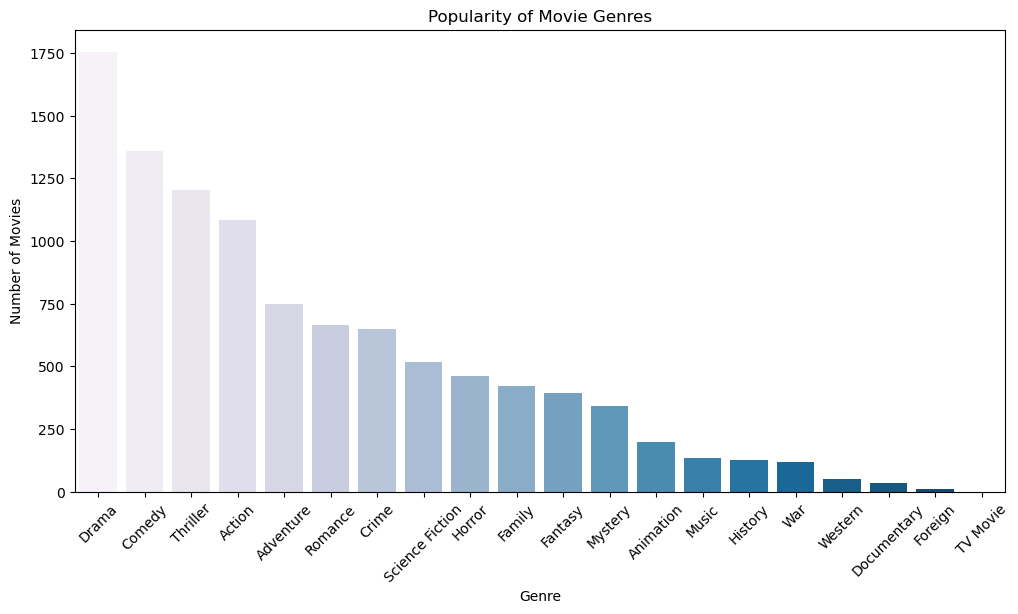

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="PuBu")
plt.xticks(rotation=45) # to make the genre more readable
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Popularity of Movie Genres")
plt.show()

> Review of the Barplot:

- Drama is the most common genre in the dataset
- Comedy & thriller are second most common genres
- Action & Adventure are popular but not as dominant as Drama , Comedy & Thriller
- We have a few less common genres such as War, Western, Documentary, Foreign, and TV Movie

<a id='conclusions'></a>
# Conclusions

In this analysis, I have ran through 5 main steps. I have started with importing the necessary libraries and loading the data. Then, I started with the Wrangling process which helped me find out more info about the data & what needs to be cleaned in my (Data Cleaning process)  which was my third step.
In my forth step (The Explotatory Data Analysis), I explored various aspects of the movie dataset, focusing on budget, revenue, and genre popularity. 

- Budget VS Revenue Relationship:

  _There is a positive relationship between the budget and revenue of movies._ 
   
- Genre popularity:

  _I started with displaying the total number of genre in the dataset & find out the unique values which later helped me to find out the most popular genre in the dataset._ 

  _The final dataset contained (20) unique genres, which were visualized using a bar chart to show the popularity of each genre & the number of movies in each genre._

#### Regarding the Limitation:
1. There was a large number of incosistencies in the data, which makes it difficult to draw conclusions.
2. There is a large number of movies in the dataset which makes it difficult to process and analyze efficiently.
3. Some movies had unrealistic budget/revenue values (fixed)
4. Genre-overlap, The movies in the dataset belonged to multiple genre which made it difficult to analyze them (fixed)


#### List of references:
 1. https://www.udacity.com/blog/author/moamen-abdelkawy
 2. https://www.datacamp.com/tutorial/tutorial-data-cleaning-tutorial
 3. https://www.data-to-viz.com/